In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../results/expr1.csv')
df

,p1,p2,g1_ratio,policy,avg_cost
0,0.1,0.9,0,random,110.833333
1,0.1,0.9,0,coupcoll-nodupe,113.066667
2,0.1,0.9,0,ratiocoll-nodupe,111.200000
3,0.1,0.9,0,epsilon-exact-nodupe,111.400000
4,0.1,0.9,1,random,109.100000
...,...,...,...,...,...
6055,0.9,0.9,99,epsilon-exact-nodupe,134.733333
6056,0.9,0.9,100,random,201.766667
6057,0.9,0.9,100,coupcoll-nodupe,111.666667
6058,0.9,0.9,100,ratiocoll-nodupe,110.533333


In [6]:
x = range(101)
probs = [0.1, 0.3, 0.5, 0.7, 0.9]
policies = ['random', 'coupcoll-nodupe', 'ratiocoll-nodupe', 'epsilon-exact-nodupe']
linestyles = ['solid'] * len(policies)

In [7]:
def plot(p1, p2):
    filtered_df = df[(df['p1'] == p1) & (df['p2'] == p2)]
    y_dict = { policy: list(filtered_df[filtered_df['policy'] == policy]['avg_cost']) for policy in policies }
    for i in range(len(policies)):
        policy = policies[i]
        linestyle = linestyles[i]
        plt.plot(x, y_dict[policy], label=policy, linestyle=linestyle)
    plt.legend()
    plt.xlabel('G1 Query %')
    plt.ylabel('Avg Cost')
    plt.title("P*1 = " + str(p1) + ", P*2 = " + str(p2))
    plt.savefig('expr1-' + str(p1) + '-' + str(p2) + '.png', bbox_inches='tight')
    plt.show()

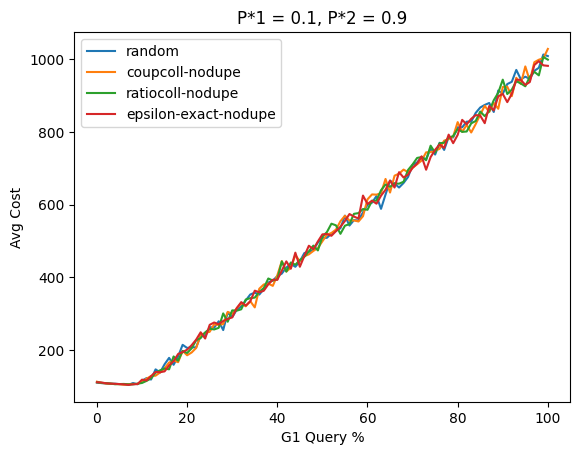

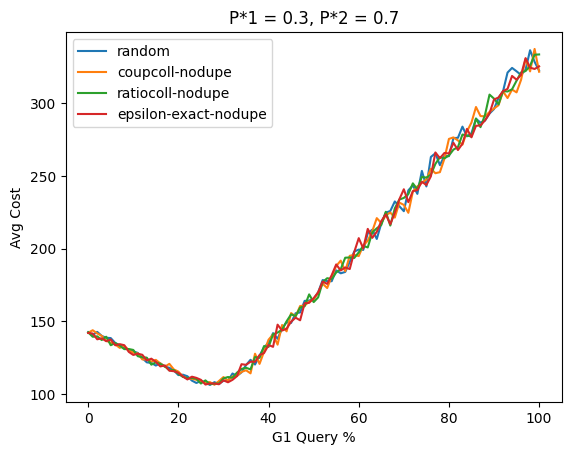

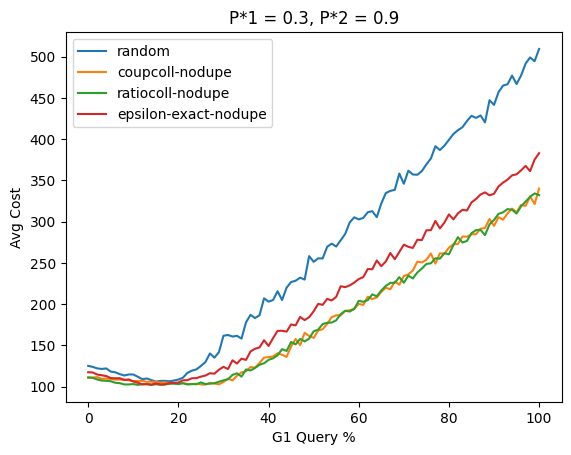

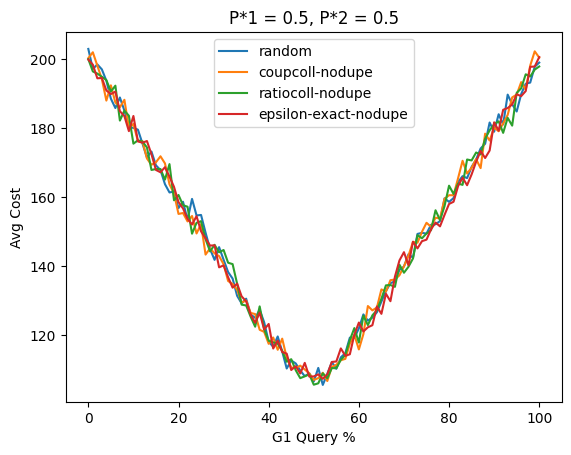

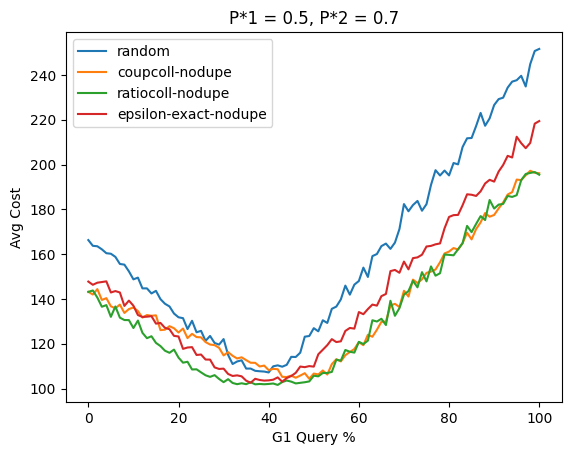

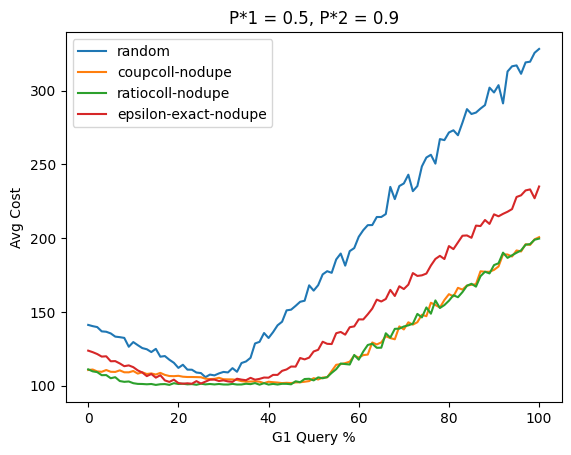

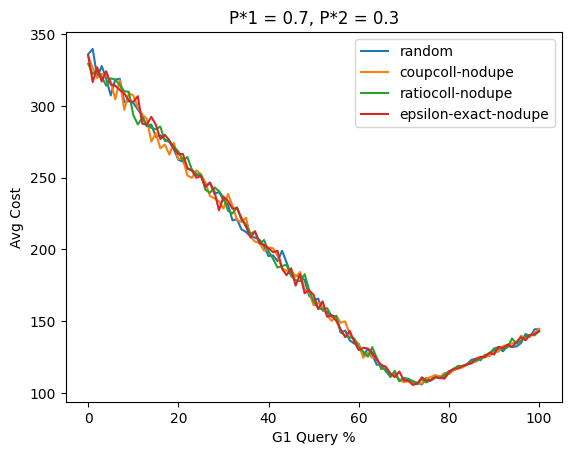

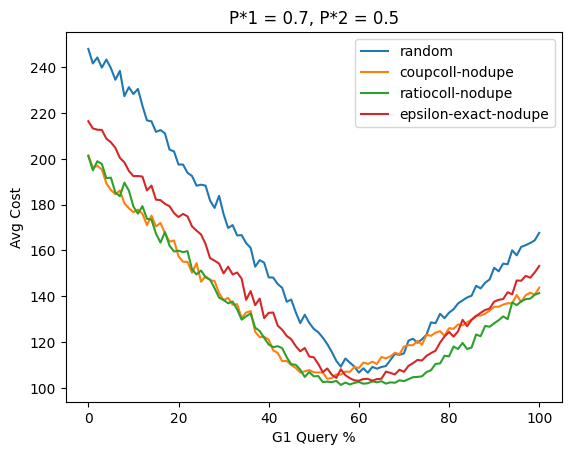

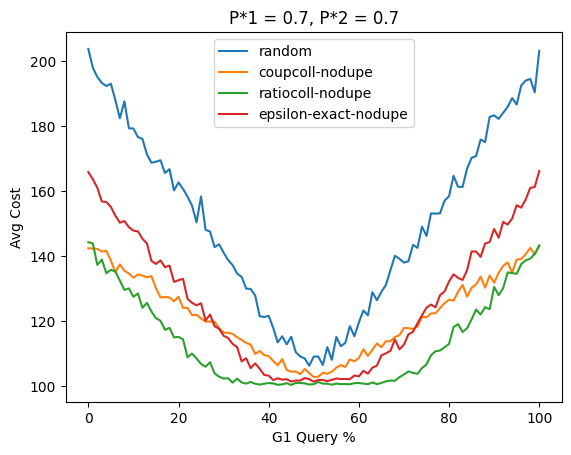

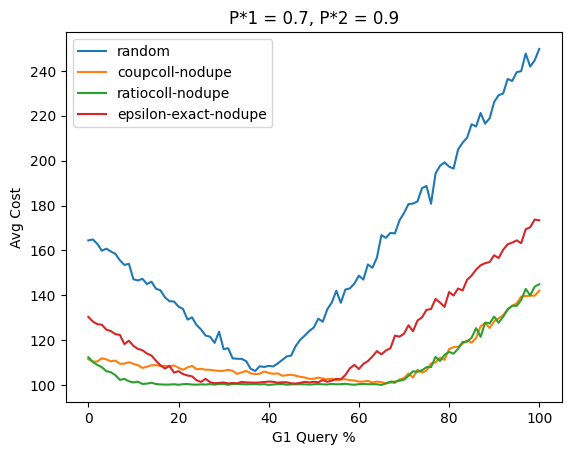

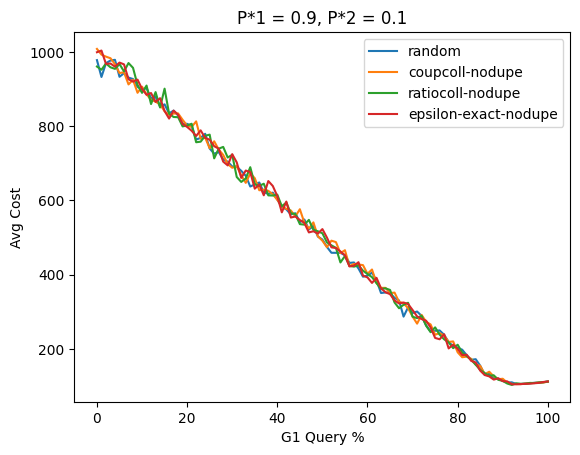

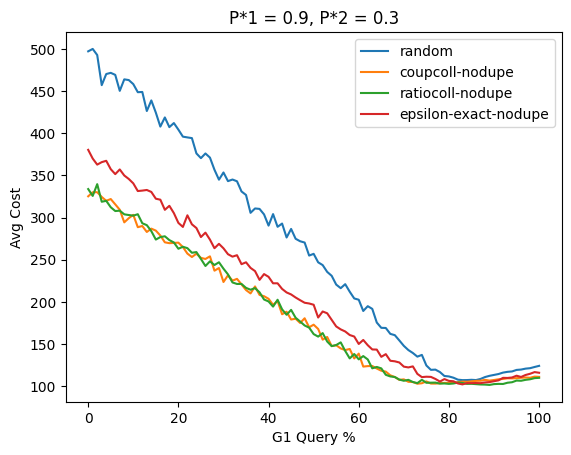

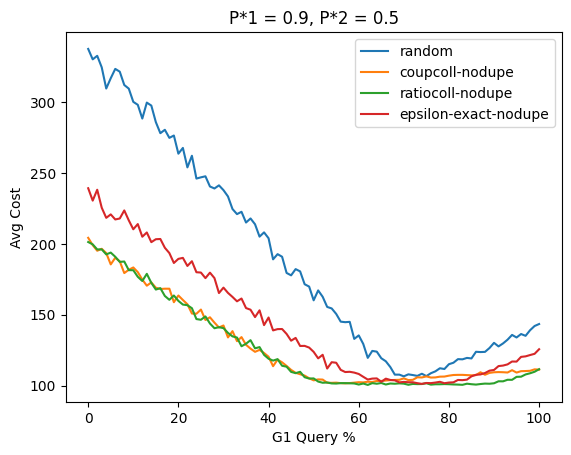

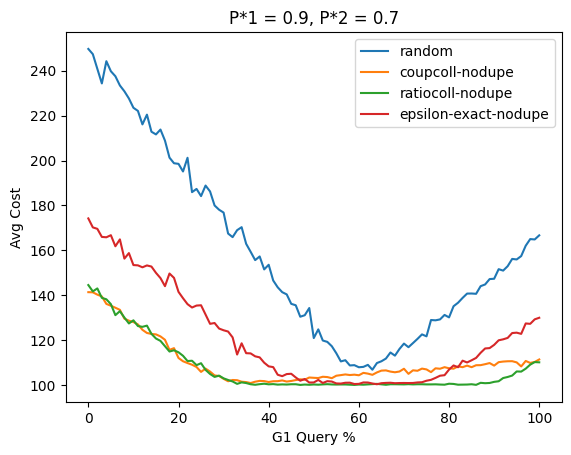

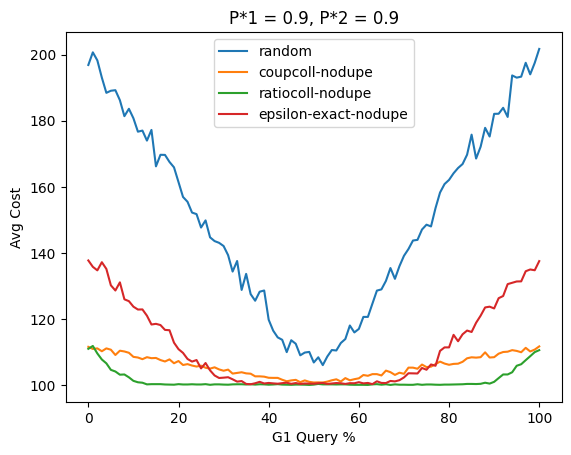

In [8]:
for p1 in probs:
    for p2 in probs:
        if p1 + p2 < 1:
            continue
        else:
            plot(p1, p2)